In [5]:
import math
import random
import requests
import json
import pandas as pd
import googlemaps
import numpy as np
import folium
import matplotlib.pyplot as plt
import koreanize_matplotlib
import urllib.request
import datetime
import time
from branca.colormap import LinearColormap
import pymysql
import pandas
import re
from glob import glob
import mysql.connector
import pandas as pd
import seaborn as sns
from haversine import haversine


import mysql.connector
import pandas as pd
import chardet
import altair as alt

/tmp/ipykernel_14358/3188872572.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# 주제 : 기후동행카드 유효성 입증 및 효과성 증대를 위한 추가방안 제시  
  
## 1. 기후동행카드 유효성 입증 
  
### - 기후동행 카드란 ?
- 1회 요금 충전으로 30일간 대중교통(지하철, 버스), 따릉이를 무제한 이용할 수 있는 대중교통 통합 정기권  
- 이용범위 : 서울지역 지하철, 서울시 면허 시내·마을버스, 따릉이  
- 이용제외: 신분당선, 서울지역 외 지하철, 광역/공항버스, 타 지역 면허버스  

### - 기후동행카드 목적
- 탄소배출 줄이기
- 시민 교통비 절감

### - 유효성 확인 기준 및 방법  
- 탄소배출 줄이기 : 현재 서울시 탄소배출량 확인 후 자차 이동 비율의 일정 인구가 대중교통을 이용할시 절감되는 탄소배출량 예상  
- 시민 교통비 절감 : 가산디지털 단지를 중심으로 지하철 버스 노선별 왕복 운임비 * 20(WORKDAY) VS 65,000


## 1.1 서울시 생활이동 인구 분포 확인  


- 서울 생활이동 인구란 ? :   
서울안에서 이동하거나 서울 외부에서 서울로 오고 간 이동으로 통근, 통학, 쇼핑, 여가 등 행정수요를 유발하는 모든 이동  

### 1.1.1 서울 생활이동 현황
서울시 및 경인권 지역의 서울시로 이동하는 유동인구수,이동유형 확인  

In [2]:
s_mv_pop=pd.read_csv("../../data/eda_project/서울시 생활인구_202402.csv",encoding='utf-8', index_col=0)

In [3]:
s_mv_pop['출발 시'] = s_mv_pop['출발 시군구'].str.replace(r'.{3}구$', '', regex=True)
s_mv_pop['도착 시'] = s_mv_pop['도착 시군구'].str.replace(r'.{3}구$', '', regex=True)

In [4]:
s_mv_pop['출발 시'].unique()

array(['서울특별시', '서울특별', '서울특별시 ', '부산광역시', '대구광역시', '인천광역', '인천광역시',
       '인천광역시 강화군', '인천광역시 옹진군', '광주광역시', '대전광역시', '울산광역시', '세종특별자치시',
       '경기도 수원시', '경기도 성남시', '경기도 의정부시', '경기도 안양시', '경기도 부천시', '경기도 광명시',
       '경기도 평택시', '경기도 동두천시', '경기도 안산시', '경기도 고양시', '경기도 고양시 ', '경기도 과천시',
       '경기도 구리시', '경기도 남양주시', '경기도 오산시', '경기도 시흥시', '경기도 군포시', '경기도 의왕시',
       '경기도 하남시', '경기도 용인시', '경기도 파주시', '경기도 이천시', '경기도 안성시', '경기도 김포시',
       '경기도 화성시', '경기도 광주시', '경기도 양주시', '경기도 포천시', '경기도 여주시', '경기도 연천군',
       '경기도 가평군', '경기도 양평군', '강원도', '충청북도', '충청남도', '전라북도', '전라남도',
       '경상북도', '경상남도', '제주특별자치도'], dtype=object)

In [5]:
s_mv_pop['출발 시'] = s_mv_pop['출발 시'].str.replace(r'^서울특별시?\s*$', '서울특별시', regex=True)
s_mv_pop['도착 시'] = s_mv_pop['도착 시'].str.replace(r'^서울특별시?\s*$', '서울특별시', regex=True)
s_mv_pop['출발 시'] = s_mv_pop['출발 시'].str.replace(r'^인천광역?\s*$', '인천광역시', regex=True)
s_mv_pop['도착 시'] = s_mv_pop['도착 시'].str.replace(r'^인천광역?\s*$', '인천광역시', regex=True)

In [6]:
s_mv_pop['도착 시'].unique()

array(['서울특별시', '부산광역시', '대구광역시', '인천광역시', '인천광역시 강화군', '광주광역시', '대전광역시',
       '울산광역시', '세종특별자치시', '경기도 수원시', '경기도 성남시', '경기도 의정부시', '경기도 안양시',
       '경기도 부천시', '경기도 광명시', '경기도 평택시', '경기도 동두천시', '경기도 안산시', '경기도 고양시',
       '경기도 고양시 ', '경기도 과천시', '경기도 구리시', '경기도 남양주시', '경기도 오산시', '경기도 시흥시',
       '경기도 군포시', '경기도 의왕시', '경기도 하남시', '경기도 용인시', '경기도 파주시', '경기도 이천시',
       '경기도 안성시', '경기도 김포시', '경기도 화성시', '경기도 광주시', '경기도 양주시', '경기도 포천시',
       '경기도 여주시', '경기도 연천군', '경기도 가평군', '경기도 양평군', '강원도', '충청북도', '충청남도',
       '전라북도', '전라남도', '경상북도', '경상남도', '제주특별자치도', '인천광역시 옹진군'],
      dtype=object)

In [7]:
s_mv_pop['출발 시'].unique()

array(['서울특별시', '부산광역시', '대구광역시', '인천광역시', '인천광역시 강화군', '인천광역시 옹진군',
       '광주광역시', '대전광역시', '울산광역시', '세종특별자치시', '경기도 수원시', '경기도 성남시',
       '경기도 의정부시', '경기도 안양시', '경기도 부천시', '경기도 광명시', '경기도 평택시', '경기도 동두천시',
       '경기도 안산시', '경기도 고양시', '경기도 고양시 ', '경기도 과천시', '경기도 구리시', '경기도 남양주시',
       '경기도 오산시', '경기도 시흥시', '경기도 군포시', '경기도 의왕시', '경기도 하남시', '경기도 용인시',
       '경기도 파주시', '경기도 이천시', '경기도 안성시', '경기도 김포시', '경기도 화성시', '경기도 광주시',
       '경기도 양주시', '경기도 포천시', '경기도 여주시', '경기도 연천군', '경기도 가평군', '경기도 양평군',
       '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도', '경상남도', '제주특별자치도'],
      dtype=object)

In [8]:
s_mv_pop['출발 도'] = s_mv_pop['출발 시'].apply(lambda x: x.split(' ')[0] if isinstance(x, str) else None)

In [9]:
s_mv_pop['도착 도'] = s_mv_pop['도착 시'].apply(lambda x: x.split(' ')[0] if isinstance(x, str) else None)

In [10]:
s_mv_pop.head()
s_mv_pop['출발 도'].unique()

array(['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시',
       '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도',
       '경상남도', '제주특별자치도'], dtype=object)

In [11]:
s_mv_pop.to_csv("서울시 생활인구_202402_final.csv", index=False)

In [6]:
s_mv_pop=pd.read_csv("../../data/eda_project/서울시 생활인구_202402_final.csv",encoding='utf-8', index_col=0)

In [7]:
s_mv_pop['출발 시'].unique()

array(['서울특별시', '부산광역시', '대구광역시', '인천광역시', '인천광역시 강화군', '인천광역시 옹진군',
       '광주광역시', '대전광역시', '울산광역시', '세종특별자치시', '경기도 수원시', '경기도 성남시',
       '경기도 의정부시', '경기도 안양시', '경기도 부천시', '경기도 광명시', '경기도 평택시', '경기도 동두천시',
       '경기도 안산시', '경기도 고양시', '경기도 고양시 ', '경기도 과천시', '경기도 구리시', '경기도 남양주시',
       '경기도 오산시', '경기도 시흥시', '경기도 군포시', '경기도 의왕시', '경기도 하남시', '경기도 용인시',
       '경기도 파주시', '경기도 이천시', '경기도 안성시', '경기도 김포시', '경기도 화성시', '경기도 광주시',
       '경기도 양주시', '경기도 포천시', '경기도 여주시', '경기도 연천군', '경기도 가평군', '경기도 양평군',
       '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도', '경상남도', '제주특별자치도'],
      dtype=object)

경기도 고양시가 중복이다

In [8]:
s_mv_pop['출발 시'].replace('경기도 고양시 ', '경기도 고양시', inplace=True)
s_mv_pop['도착 시'].replace('경기도 고양시 ', '경기도 고양시', inplace=True)

/tmp/ipykernel_14358/707107243.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  s_mv_pop['출발 시'].replace('경기도 고양시 ', '경기도 고양시', inplace=True)
/tmp/ipykernel_14358/707107243.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace

단위 : 100만

기지국에 집계되는 kt 휴대폰 곡객 신호 바탕으로 출발지와 목적지별 이동 인원수를 가공한 데이터  
![image.png](attachment:image.png)

In [9]:
from_seoul_mv_pop = s_mv_pop.loc[s_mv_pop['출발 시'] == '서울특별시']

In [10]:
from_seoul_mv_pop['출발 시'].unique()

array(['서울특별시'], dtype=object)

In [11]:
from_seoul_mv_pop.head()

,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합),출발 시군구,도착 시군구,출발 시,도착 시,출발 도,도착 도
요일,,,,,,,,,,,,,,
일,10,11010,11010,F,10,EE,36,251.33,서울특별시 종로구,서울특별시 종로구,서울특별시,서울특별시,서울특별시,서울특별시
일,10,11010,11010,F,10,EW,26,11.92,서울특별시 종로구,서울특별시 종로구,서울특별시,서울특별시,서울특별시,서울특별시
일,10,11010,11010,F,10,HE,46,207.59,서울특별시 종로구,서울특별시 종로구,서울특별시,서울특별시,서울특별시,서울특별시
일,10,11010,11010,F,15,EE,23,146.50,서울특별시 종로구,서울특별시 종로구,서울특별시,서울특별시,서울특별시,서울특별시
일,10,11010,11010,F,15,EH,22,40.29,서울특별시 종로구,서울특별시 종로구,서울특별시,서울특별시,서울특별시,서울특별시


In [12]:
seoul_to_xx_pop=from_seoul_mv_pop.pivot_table( values = '이동인구(합)', index = '도착 시',columns='출발 시',aggfunc='sum')

In [13]:
seoul_to_xx_pop = seoul_to_xx_pop.sort_values(by='서울특별시', ascending=False)

In [14]:
seoul_to_xx_pop['서울특별시']=seoul_to_xx_pop['서울특별시']/1000000

In [15]:
seoul_to_xx_pop.head()

출발 시,서울특별시
도착 시,
서울특별시,467.241905
인천광역시,8.870856
경기도 고양시,8.848980
경기도 성남시,8.227598
경기도 남양주시,5.811451


<Figure size 1000x600 with 0 Axes>

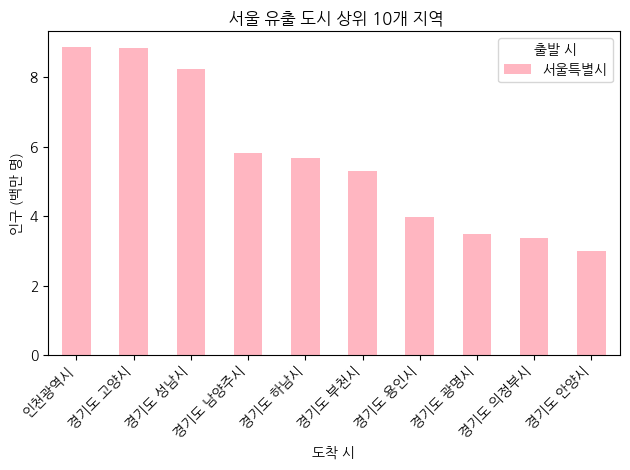

In [16]:

# 색상 설정
colors = ['#FFB6C1', '#87CEEB', '#FFD700', '#20B2AA', '#9370DB', '#FFA07A', '#98FB98', '#F08080', '#00FFFF', '#FF69B4']

# 서울특별시를 제외하고 상위 10개 도착 시 선택
top_destinations = seoul_to_xx_pop[seoul_to_xx_pop.index != '서울특별시'].nlargest(10, columns=['서울특별시'])

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))
top_destinations.plot(kind='bar', color=colors)
plt.title(' 서울 유출 도시 상위 10개 지역')
plt.xlabel('도착 시')
plt.ylabel('인구 (백만 명)')
plt.xticks(rotation=45, ha='right')  # X 축 눈금 라벨을 오른쪽으로 회전
plt.tight_layout()  # 레이아웃 조정
plt.show()

In [17]:
to_seoul_mv_pop = s_mv_pop.loc[s_mv_pop['도착 시'] == '서울특별시']
to_seoul_mv_pop['도착 시'].unique()

array(['서울특별시'], dtype=object)

In [18]:
xx_to_seoul_pop=to_seoul_mv_pop.pivot_table( values = '이동인구(합)', index = '출발 시',columns='도착 시',aggfunc='sum')

In [19]:
xx_to_seoul_pop = xx_to_seoul_pop.sort_values(by='서울특별시', ascending=False)
xx_to_seoul_pop['서울특별시']=xx_to_seoul_pop['서울특별시']/1000000

In [20]:
xx_to_seoul_pop.head()

도착 시,서울특별시
출발 시,
서울특별시,467.241905
경기도 고양시,8.899972
인천광역시,8.579684
경기도 성남시,8.241736
경기도 남양주시,5.856729


In [21]:
xx_to_seoul_pop.index

Index(['서울특별시', '경기도 고양시', '인천광역시', '경기도 성남시', '경기도 남양주시', '경기도 하남시',
       '경기도 부천시', '경기도 용인시', '경기도 광명시', '경기도 의정부시', '경기도 안양시', '경기도 김포시',
       '경기도 수원시', '경기도 구리시', '경기도 파주시', '강원도', '경기도 화성시', '경기도 광주시', '충청남도',
       '경기도 시흥시', '경기도 양주시', '경기도 과천시', '경기도 안산시', '충청북도', '경기도 군포시',
       '경기도 의왕시', '경기도 양평군', '경기도 포천시', '경기도 평택시', '경상북도', '대전광역시', '전라북도',
       '경기도 이천시', '부산광역시', '경기도 가평군', '대구광역시', '경기도 오산시', '전라남도', '경상남도',
       '제주특별자치도', '경기도 안성시', '경기도 동두천시', '경기도 여주시', '광주광역시', '인천광역시 강화군',
       '세종특별자치시', '경기도 연천군', '울산광역시', '인천광역시 옹진군'],
      dtype='object', name='출발 시')

<Figure size 1000x600 with 0 Axes>

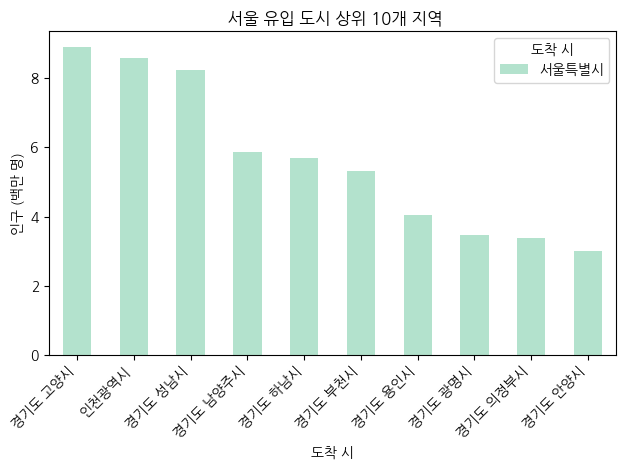

In [50]:

plt.rcParams.update({'font.size': 10})
colors = sns.color_palette("Pastel2")

# 서울특별시를 제외하고 상위 10개 도착 시 선택
top_destinations = xx_to_seoul_pop[xx_to_seoul_pop.index != '서울특별시'].nlargest(10, columns=['서울특별시'])

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))
top_destinations.plot(kind='bar', color=colors)
plt.title(' 서울 유입 도시 상위 10개 지역')
plt.xlabel('도착 시')
plt.ylabel('인구 (백만 명)')
plt.xticks(rotation=45, ha='right')  # X 축 눈금 라벨을 오른쪽으로 회전
plt.tight_layout()  # 레이아웃 조정
plt.show()

In [23]:
xx_to_seoul_pop['direction']='출발'

In [24]:
seoul_to_xx_pop['direction']='도착'

In [25]:
s_mv_df = pd.concat([xx_to_seoul_pop,seoul_to_xx_pop], axis= 0)

In [26]:
s_mv_df = s_mv_df.rename(columns={'서울특별시': '인구이동수'})


In [27]:
s_mv_df.head()

,인구이동수,direction
서울특별시,467.241905,출발
경기도 고양시,8.899972,출발
인천광역시,8.579684,출발
경기도 성남시,8.241736,출발
경기도 남양주시,5.856729,출발


In [28]:
total_s_mv_df = s_mv_df.pivot_table(columns="direction", values='인구이동수',aggfunc=np.sum)


/tmp/ipykernel_14358/3108464409.py:1: FutureWarning: The provided callable <function sum at 0x7d6f74567eb0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  total_s_mv_df = s_mv_df.pivot_table(columns="direction", values='인구이동수',aggfunc=np.sum)


2월달 인구이동수 (서울로 오고가는 인원 40만명 차이난다. 거의 유입,유출인원 동일)

In [43]:
total_s_mv_df = total_s_mv_df.rename(columns={'도착': '유입'})
total_s_mv_df = total_s_mv_df.rename(columns={'출발': '유출'})

In [44]:
total_s_mv_df

direction,유입,유출
인구이동수,558.417716,558.072516


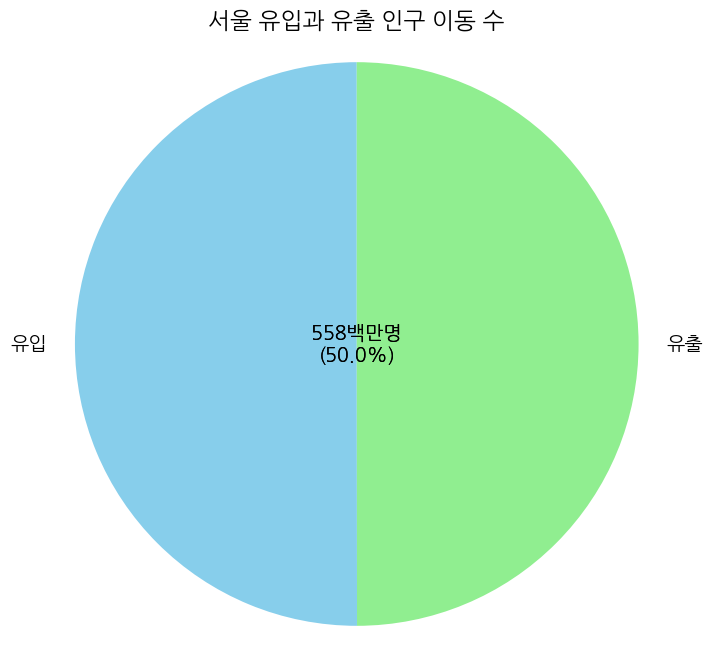

In [45]:
# 데이터프레임에서 값 추출
population_movement = total_s_mv_df.iloc[0]

# 파이 그래프 그리기
plt.figure(figsize=(8, 8))
plt.pie(population_movement, labels=population_movement.index, startangle=90, colors=['skyblue', 'lightgreen'])

# 각 섹션의 중심에 인원 수 표시
total_population = sum(population_movement)
for i, (label, value) in enumerate(zip(population_movement.index, population_movement)):
    percentage = (value / total_population) * 100
    plt.text(0, 0, f'{value:.0f}백만명\n({percentage:.1f}%)', ha='center', va='center', fontsize=14)

plt.title('서울 유입과 유출 인구 이동 수')
plt.axis('equal')  # 원 그래프를 원형으로 보이도록 설정
plt.show()


In [24]:

print("2월달 총 유입 유출 인구수 차이는:", (total_s_mv_df["도착"] - total_s_mv_df["출발"]).values[0] * 1000000)

2월달 총 유입 유출 인구수 차이는: 345199.6399999189


34만명 차이로 거의 유사하다

각 도별로 서울 유입,출 인구수 차이를 봐보자

In [25]:
s_mv_df.head()

,인구이동수,direction
서울특별시,467.241905,출발
인천광역시,8.579684,출발
경기도 성남시,8.241736,출발
경기도 남양주시,5.856729,출발
경기도 하남시,5.695446,출발


In [26]:
s_mv_df.reset_index(drop=False, inplace=True)

In [27]:
s_mv_df.head()

,index,인구이동수,direction
0,서울특별시,467.241905,출발
1,인천광역시,8.579684,출발
2,경기도 성남시,8.241736,출발
3,경기도 남양주시,5.856729,출발
4,경기도 하남시,5.695446,출발


In [28]:
s_mv_df = s_mv_df.rename(columns={'index': '시구'})

In [29]:
s_mv_df['시'] = s_mv_df['시구'].apply(lambda x: x.split(' ')[0] if isinstance(x, str) else None)

In [30]:
s_mv_df.head()

,시구,인구이동수,direction,시
0,서울특별시,467.241905,출발,서울특별시
1,인천광역시,8.579684,출발,인천광역시
2,경기도 성남시,8.241736,출발,경기도
3,경기도 남양주시,5.856729,출발,경기도
4,경기도 하남시,5.695446,출발,경기도


In [31]:
s_mv_df['시'].unique()

array(['서울특별시', '인천광역시', '경기도', '강원도', '충청남도', '충청북도', '경상북도', '대전광역시',
       '전라북도', '부산광역시', '대구광역시', '전라남도', '경상남도', '제주특별자치도', '광주광역시',
       '세종특별자치시', '울산광역시'], dtype=object)

In [32]:
si_s_mv_df = s_mv_df.pivot_table(index='시',columns="direction", values='인구이동수',aggfunc=np.sum).sort_values(by='도착',ascending=False)

/tmp/ipykernel_6339/2693517706.py:1: FutureWarning: The provided callable <function sum at 0x74f945bb0940> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  si_s_mv_df = s_mv_df.pivot_table(index='시',columns="direction", values='인구이동수',aggfunc=np.sum).sort_values(by='도착',ascending=False)


In [33]:
si_s_mv_df.head()

direction,도착,출발
시,,
서울특별시,467.241905,467.241905
경기도,73.029895,73.384146
인천광역시,9.116782,8.824932
강원도,1.995096,1.951771
충청남도,1.618949,1.592392


In [34]:
si_s_mv_df.rename(columns={'도착' :'서울 유입 인구','출발' :'서울 유출 인구'},inplace=True)

In [38]:
si_s_mv_df

direction,서울 유입 인구,서울 유출 인구
시,,
서울특별시,467.241905,467.241905
경기도,73.029895,73.384146
인천광역시,9.116782,8.824932
강원도,1.995096,1.951771
충청남도,1.618949,1.592392
충청북도,1.037347,1.026646
경상북도,0.610598,0.607483
대전광역시,0.592182,0.598576
전라북도,0.566600,0.558439


서울 : 4억 6천만명  
경기도 : 7천만명  
인천광역시 : 9백만명  

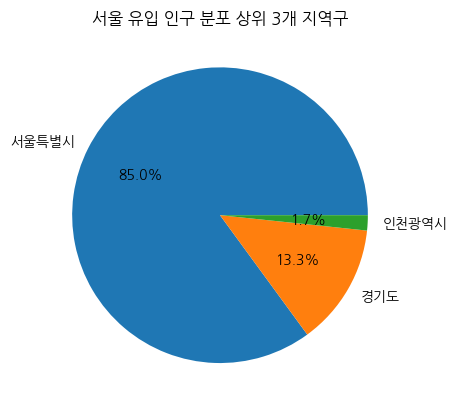

In [36]:
plt.pie(si_s_mv_df['서울 유입 인구'][0:3], labels =si_s_mv_df[0:3].index,autopct = '%.1f%%')
plt.title('서울 유입 인구 분포 상위 3개 지역구')
plt.show()

한달동안 서울 유입한 분포를 보았을때 서울에서 서울로 이동한(ex : 서울 00구 -> 서울 00구)인구가 확실히 많다  
기후동행카드 서울시 시행 유의미하다.


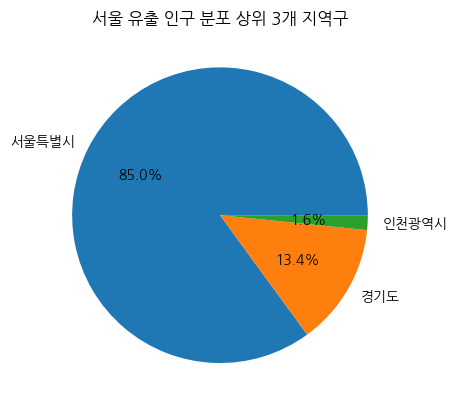

In [39]:
plt.pie(si_s_mv_df['서울 유출 인구'][0:3], labels =si_s_mv_df[0:3].index,autopct = '%.1f%%')
plt.title('서울 유출 인구 분포 상위 3개 지역구')
plt.show()

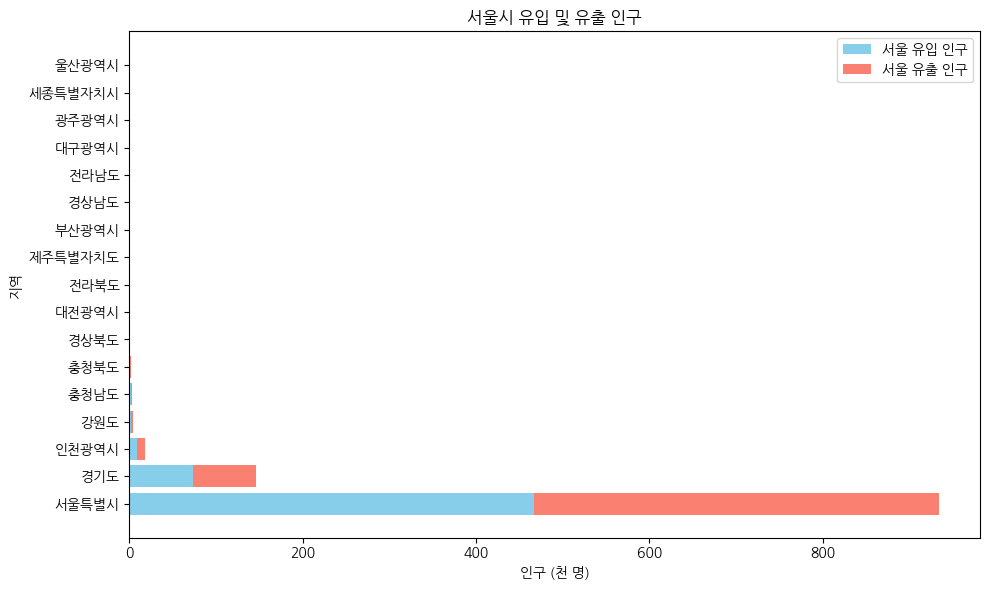

In [40]:
plt.figure(figsize=(10, 6))
plt.barh(si_s_mv_df.index, si_s_mv_df['서울 유입 인구'], color='skyblue', label='서울 유입 인구')
plt.barh(si_s_mv_df.index, si_s_mv_df['서울 유출 인구'], color='salmon', label='서울 유출 인구', left=si_s_mv_df['서울 유입 인구'])

plt.xlabel('인구 (천 명)')
plt.ylabel('지역')
plt.title('서울시 유입 및 유출 인구')

plt.legend()
plt.tight_layout()

In [49]:
m = folium.Map(location=[36.5, 127.5], zoom_start=7)

# 지도에 도시 표시
data = {
    '서울특별시': {'location': [37.5665, 126.9780], 'influx': 467.241905, 'outflux': 467.241905},
    '경기도': {'location': [37.4138, 127.5183], 'influx': 73.029895, 'outflux': 73.384146},
    '인천광역시': {'location': [37.4563, 126.7052], 'influx': 9.116782, 'outflux': 8.824932},
    '강원도': {'location': [37.8228, 128.1555], 'influx': 1.995096, 'outflux': 1.951771},
    '충청남도': {'location': [36.6366, 126.6730], 'influx': 1.618949, 'outflux': 1.592392},
    '충청북도': {'location': [36.6285, 127.9293], 'influx': 1.037347, 'outflux': 1.026646},
    '경상북도': {'location': [36.4919, 128.8889], 'influx': 0.610598, 'outflux': 0.607483},
    '대전광역시': {'location': [36.3504, 127.3845], 'influx': 0.592182, 'outflux': 0.598576},
    '전라북도': {'location': [35.7167, 127.1442], 'influx': 0.566600, 'outflux': 0.558439},
    '제주특별자치도': {'location': [33.4996, 126.5312], 'influx': 0.493764, 'outflux': 0.290959},
    '부산광역시': {'location': [35.1796, 129.0756], 'influx': 0.471840, 'outflux': 0.437295},
    '경상남도': {'location': [35.4606, 128.2132], 'influx': 0.356788, 'outflux': 0.324639},
    '전라남도': {'location': [34.8679, 126.9910], 'influx': 0.356709, 'outflux': 0.332056},
    '대구광역시': {'location': [35.8714, 128.6014], 'influx': 0.340667, 'outflux': 0.332708},
    '광주광역시': {'location': [35.1595, 126.8526], 'influx': 0.260326, 'outflux': 0.253110},
    '세종특별자치시': {'location': [36.4801, 127.2892], 'influx': 0.222158, 'outflux': 0.210432},
    '울산광역시': {'location': [35.5384, 129.3114], 'influx': 0.106111, 'outflux': 0.105026}
}

# 유입 및 유출 인구를 원형 마커로 표시
for city, info in data.items():
    folium.CircleMarker(
        location=info['location'],
        radius=info['influx'] * 10,
        # color='blue',
        # fill=True,
        # fill_color='blue',
        fill_opacity=0.5,
        popup=f"서울 유입 인구: {info['influx']:.2f} 천 명\n서울 유출 인구: {info['outflux']:.2f} 천 명"
    ).add_to(m)

# 지도 출력
m

In [52]:
m = folium.Map(location=[36.5, 127.5], zoom_start=7)

# 지도에 도시 표시
data = {
    '서울특별시': {'location': [37.5665, 126.9780], 'influx': 467.241905, 'outflux': 467.241905},
    '경기도': {'location': [37.4138, 127.5183], 'influx': 73.029895, 'outflux': 73.384146},
    '인천광역시': {'location': [37.4563, 126.7052], 'influx': 9.116782, 'outflux': 8.824932},
    '강원도': {'location': [37.8228, 128.1555], 'influx': 1.995096, 'outflux': 1.951771},
    '충청남도': {'location': [36.6366, 126.6730], 'influx': 1.618949, 'outflux': 1.592392},
    '충청북도': {'location': [36.6285, 127.9293], 'influx': 1.037347, 'outflux': 1.026646},
    '경상북도': {'location': [36.4919, 128.8889], 'influx': 0.610598, 'outflux': 0.607483},
    '대전광역시': {'location': [36.3504, 127.3845], 'influx': 0.592182, 'outflux': 0.598576},
    '전라북도': {'location': [35.7167, 127.1442], 'influx': 0.566600, 'outflux': 0.558439},
    '제주특별자치도': {'location': [33.4996, 126.5312], 'influx': 0.493764, 'outflux': 0.290959},
    '부산광역시': {'location': [35.1796, 129.0756], 'influx': 0.471840, 'outflux': 0.437295},
    '경상남도': {'location': [35.4606, 128.2132], 'influx': 0.356788, 'outflux': 0.324639},
    '전라남도': {'location': [34.8679, 126.9910], 'influx': 0.356709, 'outflux': 0.332056},
    '대구광역시': {'location': [35.8714, 128.6014], 'influx': 0.340667, 'outflux': 0.332708},
    '광주광역시': {'location': [35.1595, 126.8526], 'influx': 0.260326, 'outflux': 0.253110},
    '세종특별자치시': {'location': [36.4801, 127.2892], 'influx': 0.222158, 'outflux': 0.210432},
    '울산광역시': {'location': [35.5384, 129.3114], 'influx': 0.106111, 'outflux': 0.105026}
}

# 화살표로 이동량 표시
for city, info in data.items():
    influx = info['influx'] * 50  # 화살표 크기 조절
    outflux = info['outflux'] * 50  # 화살표 크기 조절
    folium.PolyLine(locations=[info['location'], [info['location'][0] + 0.1, info['location'][1] + 0.1]],
                    color='red', weight=5,  # 화살표 두께 설정
                    tooltip=f"서울 유입 인구: {info['influx']:.2f} 천 명\n서울 유출 인구: {info['outflux']:.2f} 천 명",
                    opacity=influx / 100).add_to(m)

# 지도 출력
m






산점도 : 출도착 지역간의 평균 이동시간 및 이동인구수

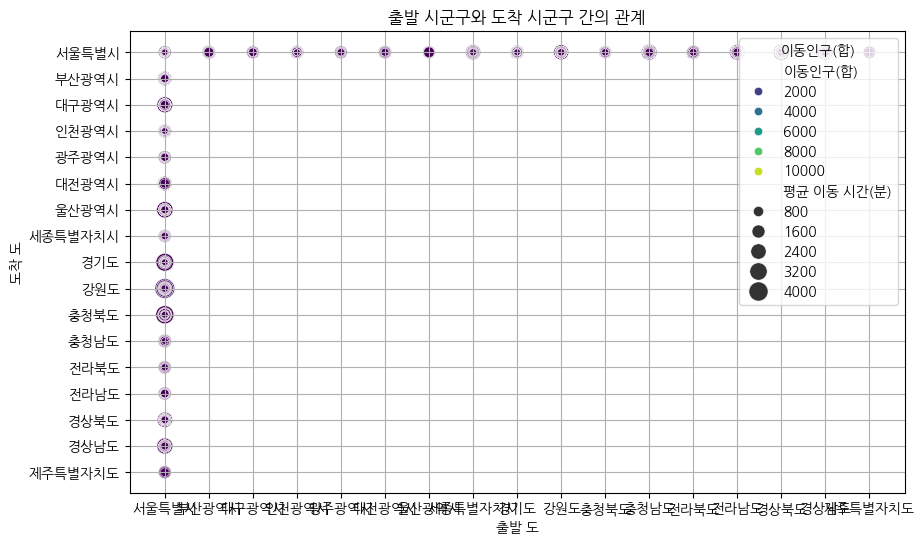

In [4]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=s_mv_pop, x='출발 도', y='도착 도', hue='이동인구(합)', size='평균 이동 시간(분)', sizes=(20, 200), palette='viridis')
plt.title('출발 시군구와 도착 시군구 간의 관계')
plt.xlabel('출발 도')
plt.ylabel('도착 도')
plt.legend(title='이동인구(합)', loc='upper right')
plt.grid(True)
plt.show()


In [2]:
remote = mysql.connector.connect(
    host = 'database-1.c3ieyo8m4v9o.ap-northeast-2.rds.amazonaws.com',
    port = 3306,
    user =  'eda_team',
    password = '123456',
    database = 'eda_project'
)

대중교통 이용 별 유동인구 확인

In [3]:
cursor = remote.cursor(buffered=True)
cursor.execute("select * from seoul_목적_22to24")

In [4]:
result = cursor.fetchall()
for row in result:
    print(row)

('서울특별시', '~', 2022, 19, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 3, 0, 1, 0, 3, 0, 2, 0, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
('서울특별시', '경로', 2022, 240404045, 238070066, 283184, 6038, 6713419, 2384970, 8058472, 8678508, 9426700, 9211072, 12414876, 12181190, 15949362, 15543418, 17828709, 18286161, 18386009, 19690352, 18939488, 19289295, 19415916, 19156168, 20812226, 19226381, 22317579, 20461743, 20434986, 19775920, 16538856, 17343298, 11844153, 13281745, 8146339, 8889751, 5937638, 5992900, 4157853, 4478656, 2160272, 2768638, 592438, 1229706, 44557, 186631, 899, 7100, 112, 387, 2, 38)
('서울특별시', '국가유공자', 2022, 6173486, 4685350, 22128, 7234, 113746, 55317, 187183, 134193, 288468, 200387, 359425, 326631, 412386, 306701, 465102, 364310, 469887, 371320, 473380, 367461, 476637, 363339, 495877, 358017, 494576, 359160, 462085, 345430, 413974, 311801, 382246, 289338, 227406, 195852, 163186, 121685, 127910, 93172, 85100, 65178, 38056, 35887, 10367, 105

In [9]:
seoul_purpose = pd.DataFrame(result)
seoul_purpose.head()

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,서울특별시,~,2022,19,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,서울특별시,경로,2022,240404045,238070066,283184,6038,6713419,2384970,8058472,...,592438,1229706,44557,186631,899,7100,112,387,2,38
2,서울특별시,국가유공자,2022,6173486,4685350,22128,7234,113746,55317,187183,...,38056,35887,10367,10500,2174,1493,1032,560,1155,384
3,서울특별시,어린이,2022,19130485,18431718,1528,382,11560,3983,38819,...,31425,65417,3774,9352,393,846,113,144,81,62
4,서울특별시,외국인,2022,1773150,1754366,1390,46,40573,10268,31055,...,26442,39552,3716,11608,78,782,6,34,0,0


In [10]:
cursor.execute("SHOW COLUMNS FROM seoul_목적_22to24")


In [11]:
columns = [column[0] for column in cursor.fetchall()]

In [13]:
seoul_purpose = pd.DataFrame(result, columns=columns)

In [14]:
seoul_purpose.head()

,시도,이용자유형,연월,합계발생량,합계도착량,4시발생량,4시도착량,5시발생량,5시도착량,6시발생량,...,23시발생량,23시도착량,24시발생량,24시도착량,1시발생량,1시도착량,2시발생량,2시도착량,3시발생량,3시도착량
0,서울특별시,~,2022,19,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,서울특별시,경로,2022,240404045,238070066,283184,6038,6713419,2384970,8058472,...,592438,1229706,44557,186631,899,7100,112,387,2,38
2,서울특별시,국가유공자,2022,6173486,4685350,22128,7234,113746,55317,187183,...,38056,35887,10367,10500,2174,1493,1032,560,1155,384
3,서울특별시,어린이,2022,19130485,18431718,1528,382,11560,3983,38819,...,31425,65417,3774,9352,393,846,113,144,81,62
4,서울특별시,외국인,2022,1773150,1754366,1390,46,40573,10268,31055,...,26442,39552,3716,11608,78,782,6,34,0,0


In [17]:
seoul_purpose = seoul_purpose.drop(0, axis=0)

In [58]:
seoul_purpose.head()

,시도,이용자유형,연월,합계발생량,합계도착량,4시발생량,4시도착량,5시발생량,5시도착량,6시발생량,...,23시발생량,23시도착량,24시발생량,24시도착량,1시발생량,1시도착량,2시발생량,2시도착량,3시발생량,3시도착량
1,서울특별시,경로,2022,240404045,238070066,283184,6038,6713419,2384970,8058472,...,592438,1229706,44557,186631,899,7100,112,387,2,38
2,서울특별시,국가유공자,2022,6173486,4685350,22128,7234,113746,55317,187183,...,38056,35887,10367,10500,2174,1493,1032,560,1155,384
3,서울특별시,어린이,2022,19130485,18431718,1528,382,11560,3983,38819,...,31425,65417,3774,9352,393,846,113,144,81,62
4,서울특별시,외국인,2022,1773150,1754366,1390,46,40573,10268,31055,...,26442,39552,3716,11608,78,782,6,34,0,0
5,서울특별시,일반인,2022,2147483647,2138133942,7845109,3304651,27636627,14824328,55767924,...,36659661,50475458,7661579,15429922,1613964,2419002,831076,952246,736948,727400


<Figure size 1000x600 with 0 Axes>

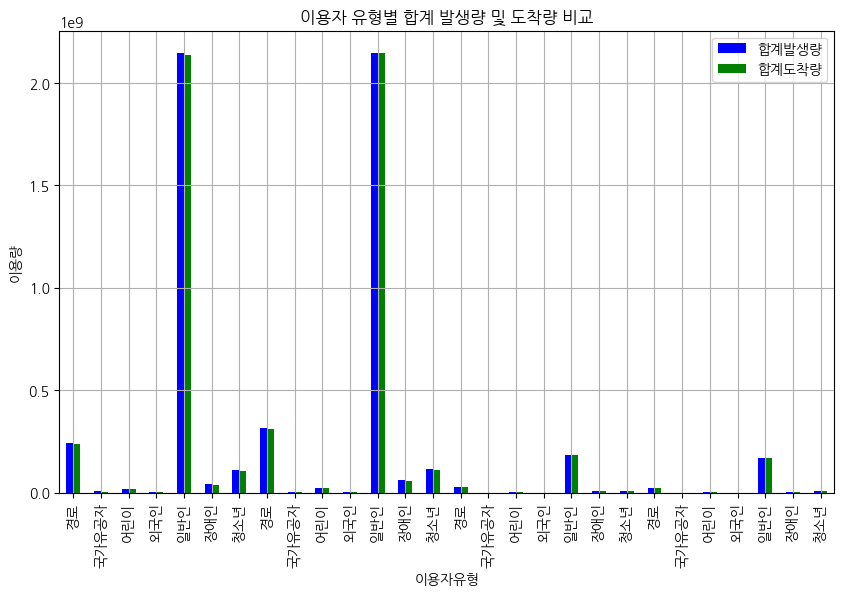

In [23]:
# 이용자 유형별 이용량 비교 시각화
plt.figure(figsize=(10, 6))

plt.figure(figsize=(10, 6))

# 막대 그래프를 그립니다.
seoul_purpose.plot(kind='bar', x='이용자유형', y=['합계발생량', '합계도착량'], color=['blue', 'green'], ax=plt.gca())

# 그래프 제목 설정
plt.title('이용자 유형별 합계 발생량 및 도착량 비교')

# y축 라벨 설정
plt.ylabel('이용량')

# 그리드 설정
plt.grid(True)

# 범례 표시
plt.legend(['합계발생량', '합계도착량'])

# 그래프 출력
plt.show()

2024년은 두달치 기록밖에 없기 때문에 2022/2023년 자료만 비교한다

<Figure size 1000x600 with 0 Axes>

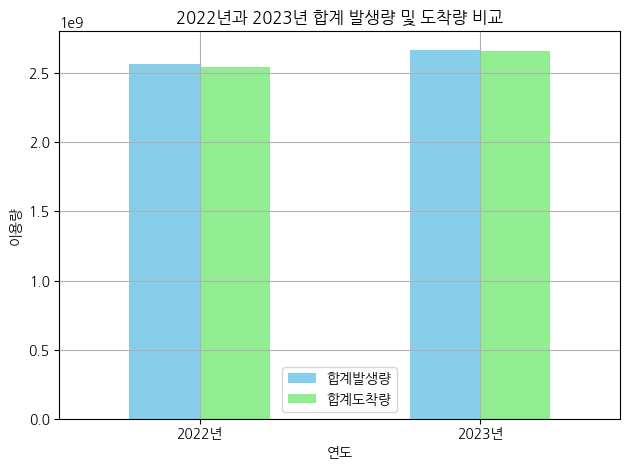

In [30]:
cursor = remote.cursor(buffered=True)
cursor.execute("SELECT * FROM seoul_목적_22to24 WHERE 연월 IN (2022, 2023)")
result = cursor.fetchall()

seoul_purpose_2223 = pd.DataFrame(result, columns=['시도', '이용자유형', '연월', '합계발생량', '합계도착량', '4시발생량', '4시도착량', '5시발생량', '5시도착량', '6시발생량', '6시도착량', '7시발생량', '7시도착량', '8시발생량', '8시도착량', '9시발생량', '9시도착량', '10시발생량', '10시도착량', '11시발생량', '11시도착량', '12시발생량', '12시도착량', '13시발생량', '13시도착량', '14시발생량', '14시도착량', '15시발생량', '15시도착량', '16시발생량', '16시도착량', '17시발생량', '17시도착량', '18시발생량', '18시도착량', '19시발생량', '19시도착량', '20시발생량', '20시도착량', '21시발생량', '21시도착량', '22시발생량', '22시도착량', '23시발생량', '23시도착량', '24시발생량', '24시도착량', '1시발생량', '1시도착량', '2시발생량', '2시도착량', '3시발생량', '3시도착량'])

seoul_purpose_2223_group = seoul_purpose_2223 .groupby('연월').sum()


colors = ['blue', 'green', 'red', 'orange', 'purple']

plt.figure(figsize=(10, 6))
seoul_purpose_2223_group[['합계발생량', '합계도착량']].plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('2022년과 2023년 합계 발생량 및 도착량 비교')
plt.xlabel('연도')
plt.ylabel('이용량')
plt.xticks(range(len(seoul_purpose_2223_group.index)), ['2022년', '2023년'], rotation=0)
plt.legend(['합계발생량', '합계도착량'])
plt.grid(True)
plt.tight_layout()
plt.show()

비슷한 수치를 보인다

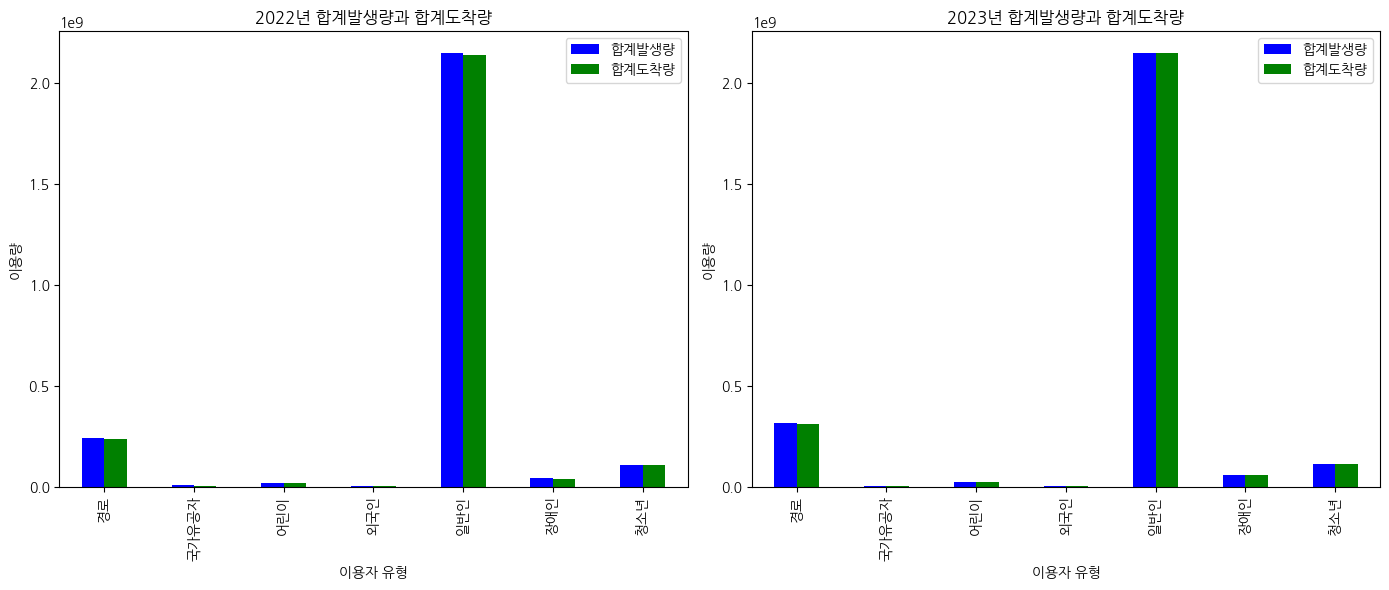

In [50]:
# 2022년 데이터
df_2022 = seoul_purpose[seoul_purpose['연월'] == 2022]

# 2023년 데이터
df_2023 = seoul_purpose[seoul_purpose['연월'] == 2023]

# 이용자 유형
이용자유형 = df_2022['이용자유형']

# 이용자 유형별 합계 발생량 및 합계 도착량 비교 시각화
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 2022년 데이터 그래프
plt.subplot(1, 2, 1)
df_2022.plot(kind='bar', x='이용자유형', y=['합계발생량', '합계도착량'], color=['blue', 'green'], ax=plt.gca())
plt.title('2022년 합계발생량과 합계도착량')
plt.xlabel('이용자 유형')
plt.ylabel('이용량')
plt.legend()

# 2023년 데이터 그래프
plt.subplot(1, 2, 2)
df_2023.plot(kind='bar', x='이용자유형', y=['합계발생량', '합계도착량'], color=['blue', 'green'], ax=plt.gca())
plt.title('2023년 합계발생량과 합계도착량')
plt.xlabel('이용자 유형')
plt.ylabel('이용량')
plt.legend()

plt.tight_layout()
plt.show()
